# Problem Set 5: Optic Flow
---
## Setup

In [21]:
# IPython magic
%load_ext autoreload
%autoreload 2
# Matplotlib magic
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
# Imports
import cv2
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
# Matplotlib params
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['figure.titlesize'] = 24
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
## Hide axes in plots
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.labelleft'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
## Axis labels
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelpad'] = 8

---
## 1. Gaussian and Laplacian Pyramids
### 1.1 Reduce

In [110]:
yos1 = cv2.imread('images/DataSeq1/yos_img_01.jpg', cv2.IMREAD_GRAYSCALE)
yos1 = yos1.astype(np.float) / 255

In [111]:
def reduce(img):
    # Reduction filter
    w = np.array([[1, 4, 6, 4, 1]]) / 16
    # Apply and take only odd values
    img_red = cv2.sepFilter2D(img, -1, w, w)[::2, ::2]
    return img_red

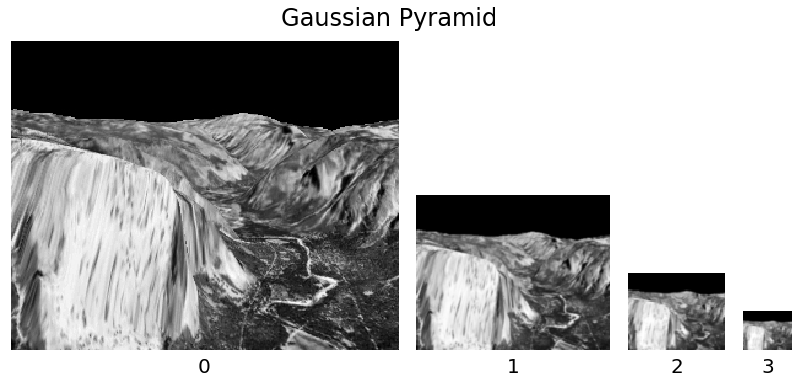

In [112]:
num_levels = 4
fig = plt.figure()
fig.suptitle('Gaussian Pyramid', y=0.72)
gs = gridspec.GridSpec(1, num_levels, width_ratios=[2**i for i in range(num_levels)][::-1], wspace=0.1)
g = yos1
for i in range(num_levels):
    ax = plt.subplot(gs[i])
    ax.imshow(g)
    ax.set_anchor('S')
    ax.set_xlabel(i)
    g = reduce(g)

### 1.2 Expand

In [ ]:
def expand(img):
    # Expansion filters
    w1 = np.array([[1, 6, 1]]) / 8
    w2 = np.array([[1, 1]]) / 2
    # Horizontal
    odd = cv2.filter2D(img, -1, w1, borderType=cv2.BORDER_REFLECT)
    even = cv2.filter2D(img, -1, w2, anchor=(0,0), borderType=cv2.BORDER_REFLECT)
#     odd = correlate2d(img, w1, mode='same', boundary='symm')
#     even = correlate2d(img, w2, mode='same', boundary='symm')
    temp = np.empty((img.shape[0], 2*img.shape[1]))
    temp[:, ::2] = odd
    temp[:, 1::2] = even
    # Vertical
    odd = cv2.filter2D(temp, -1, w1.T, borderType=cv2.BORDER_REFLECT)
    even = cv2.filter2D(temp, -1, w2.T, anchor=(0,0), borderType=cv2.BORDER_REFLECT)
#     odd = correlate2d(temp, w1.T, mode='same', boundary='symm')
#     even = correlate2d(temp, w2.T, mode='same', boundary='symm')
    img_ex = np.empty((2*img.shape[0], 2*img.shape[1]))
    img_ex[::2, :] = odd
    img_ex[1::2, :] = even
    return img_ex

In [ ]:
g = yos1
for _ in range(1):
    g = expand(reduce(g))
plt.imshow(yos1-g)

---
## 2. Lucas Kanade optic flow
### 2.1 Reduce

### 2.2 Expand

### 2.3 Expand

---
## 3. Hierarchical LK optic flow

---
## 4. The Juggle Sequence

---
## 5. The Taxi Sequence